In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from wordcloud import WordCloud
from textblob import TextBlob
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('omw-1.4')
import string
import re
import demoji
import contractions


df = pd.read_csv("C:/NLP/data/vaccination_tweets.csv",delimiter=',')

df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [2]:
def clean_text(text):
    
    text = str(text).lower()

    text = re.sub(r'<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = demoji.replace(text,'')
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    
    return text

df['text'] = df['text'].apply(clean_text)


df['text'].head(10)

0    same folks said daikon paste could treat a cyt...
1    while the world has been on the wrong side of ...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts are immutable senator even when youre no...
4    explain to me again why we need a vaccine bori...
5    does anyone have any useful adviceguidance for...
6    it is a bit sad to claim the fame for success ...
7    there have not been many bright days in 2020 b...
8    covid vaccine you getting it\n\n covidvaccine ...
9    covidvaccine \n\nstates will start getting cov...
Name: text, dtype: object

In [3]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['text'] = df['text'].apply(remove_stopwords)

df['text'].head(10)


0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
5    anyone useful adviceguidance whether covid vac...
6    bit sad claim fame success vaccination patriot...
7    many bright days 2020 best 1 bidenharris winni...
8    covid vaccine getting covidvaccine covid19 pfi...
9    covidvaccine states start getting covid19vacci...
Name: text, dtype: object

In [4]:
lemma = WordNetLemmatizer()

def lemma_text(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)


df['text'] = df['text'].apply(lemma_text)

df['text'].head(10)


0    folk said daikon paste could treat cytokine st...
1    world wrong side history year hopefully bigges...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    fact immutable senator even youre ethically st...
4    explain need vaccine borisjohnson matthancock ...
5    anyone useful adviceguidance whether covid vac...
6    bit sad claim fame success vaccination patriot...
7    many bright day 2020 best 1 bidenharris winnin...
8    covid vaccine getting covidvaccine covid19 pfi...
9    covidvaccine state start getting covid19vaccin...
Name: text, dtype: object

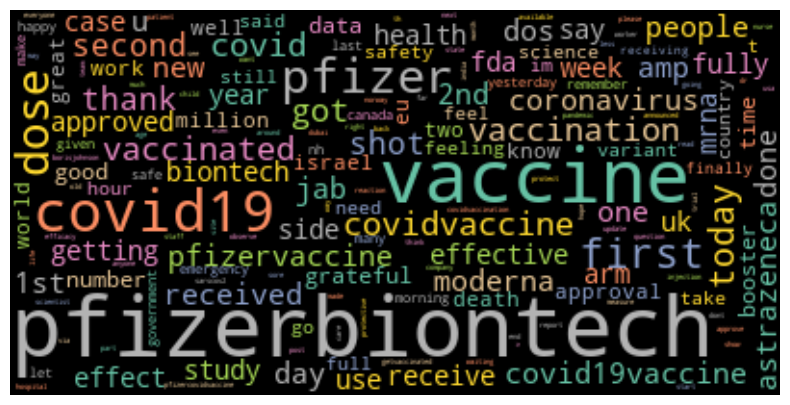

In [5]:
sample_txt = " ".join(i for i in df['text'])

plt.figure(figsize=(10,5))
wc = WordCloud(colormap='Set2',collocations=False).generate(sample_txt)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()




In [6]:
blob = TextBlob(sample_txt)


## most frequent tweets about vaccinations

top_50_most_common_tweets = FreqDist(blob.words).most_common(50)
print(f"top 50 most common words\n",top_50_most_common_tweets)


top 50 most common words
 [('pfizerbiontech', 6053), ('vaccine', 4902), ('covid19', 2449), ('pfizer', 1509), ('dose', 1473), ('’', 1247), ('first', 1179), ('today', 842), ('got', 794), ('vaccinated', 740), ('covid', 701), ('vaccination', 672), ('covidvaccine', 659), ('get', 590), ('second', 564), ('shot', 552), ('dos', 481), ('amp', 462), ('moderna', 451), ('day', 441), ('people', 433), ('2nd', 431), ('coronavirus', 409), ('pfizervaccine', 404), ('one', 404), ('received', 401), ('done', 373), ('jab', 367), ('u', 354), ('2', 350), ('thank', 346), ('1st', 336), ('astrazeneca', 326), ('pfizerbiontech…', 317), ('covid19vaccine', 304), ('new', 298), ('week', 282), ('fda', 273), ('1', 253), ('effective', 252), ('uk', 239), ('side', 237), ('effect', 234), ('health', 229), ('thanks', 229), ('getting', 228), ('fully', 228), ('say', 225), ('the…', 225), ('study', 217)]


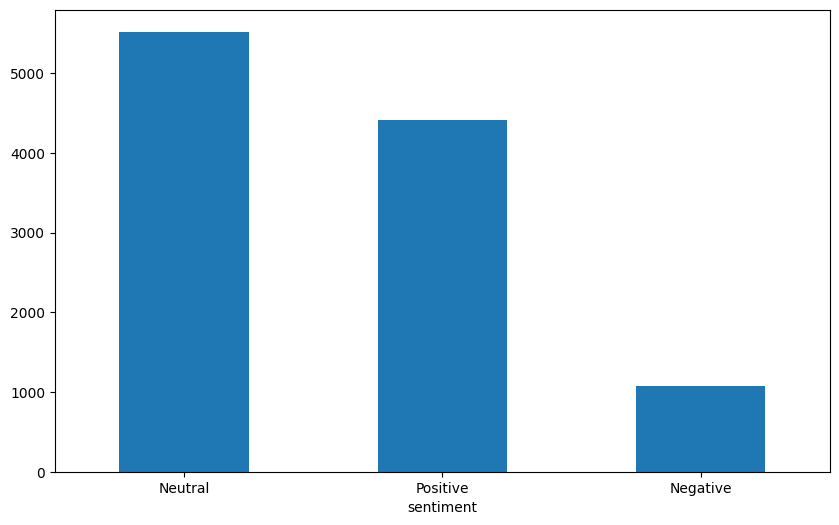

In [7]:


def polarity(text):
    return TextBlob(text).polarity

df['polarity'] = df['text'].apply(polarity)





def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

df['sentiment'] = df['polarity'].apply(sentiment)


### visuals of sentiments

plt.figure(figsize=(10,6))
df['sentiment'].value_counts().plot(kind='bar',rot=0)
plt.show()

df['sentiment'] = df['sentiment'].map({"Negative":0,"Neutral":1,"Positive":2})


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()



X = df['text']
X = cv.fit_transform(X).toarray()
y = df['sentiment']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
lr = LogisticRegression()
PA = PassiveAggressiveClassifier()



from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}; --Roc-- {clf_rpt}')
    return pred

lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)
GNB_pred = evaluate_model(X_train, X_test, y_train, y_test, GNB)

LogisticRegression, --Accuracy-- 88.61; --Roc--               precision    recall  f1-score   support

           0       0.84      0.45      0.59       218
           1       0.85      0.98      0.91      1092
           2       0.95      0.87      0.91       894

    accuracy                           0.89      2204
   macro avg       0.88      0.77      0.80      2204
weighted avg       0.89      0.89      0.88      2204

PassiveAggressiveClassifier, --Accuracy-- 90.83; --Roc--               precision    recall  f1-score   support

           0       0.82      0.58      0.68       218
           1       0.89      0.97      0.93      1092
           2       0.94      0.91      0.93       894

    accuracy                           0.91      2204
   macro avg       0.89      0.82      0.85      2204
weighted avg       0.91      0.91      0.90      2204



In [ ]:
def plot_confusion_matrix(y_test,y_pred,model):
    con_map = confusion_matrix(y_test,y_pred)
    heat_map = sns.heatmap(con_map,fmt='.2f',annot=True)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    return heat_map


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test, lr_pred, lr)
plt.show()
plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test, PA_pred, PA)
plt.show()
plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test, MNB_pred, MNB)
plt.show()
plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test, GNB_pred, GNB)
plt.show()


In [ ]:
## regular RNN
X = df['text']
y = df['sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15, random_state=42)



from tensorflow.keras.preprocessing.text import Tokenizer

num_words = 20000
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(len(word_index))


In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)




from tensorflow.keras.utils import pad_sequences,to_categorical

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Max Length of Sequences: ",max_length)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding="post")


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional,Dropout


RNN = Sequential()
RNN.add(Embedding(len(word_index)+1,output_dim=100,input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(50,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.2))
RNN.add(Dense(80,activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(3,activation='softmax'))
RNN.summary()


RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)
pred = RNN.predict(X_test)
loss,acc = RNN.evaluate(X_test,y_test)
print(f"Test Loss: {loss}")
print(f"Test accuracy: {acc*100:.2f}%")

In [ ]:
y_true = np.argmax(y_test,axis=1)
y_pred = np.argmax(pred,axis=1)


conf_matrix = confusion_matrix(y_true,y_pred)


plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='coolwarm',xticklabels=['Negative','Neutral','Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.show()


In [ ]:
clf_rpt=  classification_report(y_true, y_pred)
print(f"Classification Report from RNN: {clf_rpt}%")